In [1]:
from test.test_maps import *

#draw_maps()

In [2]:
from test.test_sensor import *

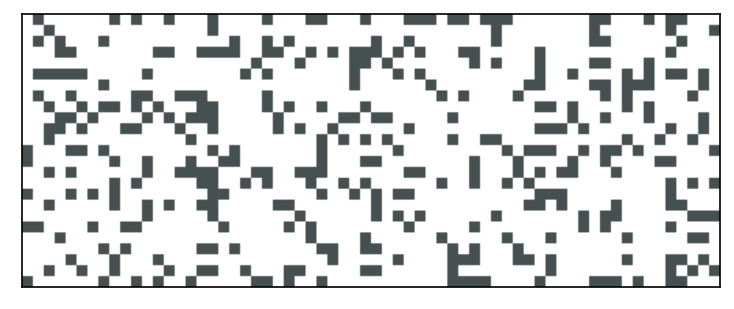

In [3]:
draw(sensor_maps[3])

In [4]:
from src.A_star_Replanning.a_star_replanning import *

In [5]:
p = a_star_replanning(sensor_maps[3], (0,0), (24, 63))

In [6]:
p

False